# 🔬 Beijing Air Quality
## 📘 Notebook 02 – Data Cleaning

| Field         | Description                                        |
|:--------------|:---------------------------------------------------|
| Author:       |	Robert Steven Elliott                            |
| Course:       |	Code Institute – Data Analytics with AI Bootcamp |
| Project Type: |	Capstone                                         |
| Date:         |	December 2025                                    |

This project complies with the CC BY 4.0 licence by including proper attribution.

## Overview

This notebook performs the second step of the ETL pipeline:
Cleaning the combined Beijing air-quality dataset.

The goal is to:
- Standardise and validate structure
- Correct inconsistencies
- Handle missing values
- Prepare a reliable base for exploration and modelling

This notebook focuses only on data cleaning, not transformation or feature engineering.

## Objectives

- Load the combined dataset (combined_stations.csv) produced in Notebook 01.
- Perform essential data cleaning tasks, including:
    - Handling missing or null values
    - Standardising column names and data types
    - Ensuring timestamp components form a valid datetime index
    - Removing duplicated rows
    - Identifying and correcting impossible or invalid sensor values
Produce a fully cleaned dataset suitable for feature engineering and exploratory analysis.
Save the cleaned dataset into the data/cleaned/ directory in a standardised format.


## Inputs
- Combined dataset file: `data/combined/combined_stations.csv`


## Outputs
- Fully cleaned dataframe with consistent column types and no structural issues.
- Exported cleaned CSV: `data/cleaned/beijing_cleaned.csv`
- Exported cleaned Parquet File: `data/cleaned/beijing_cleaned.parquet`
- Updated summary on missing values, duplicates, and data integrity checks.
- Intermediate plots or tables showing before/after cleaning effects
- Cleaning log notes for metadata
- Prepared input for Notebook 03 – Feature Engineering.


## Additional Comments
- No feature engineering is performed in this notebook—only essential cleaning steps to preserve data integrity.
- Any row loss due to missing timestamps or lag-introducing steps should be recorded for transparency in metadata.
- Manual cleaning decisions (e.g., acceptable pollutant value ranges) should be justified according to domain knowledge or cleaning plan.
- This notebook lays the foundation for reliable modelling and should be kept reproducible and well-documented.



## Citation  
This project uses data from:

**Chen, Song (2017). _Beijing Multi-Site Air Quality_. UCI Machine Learning Repository.**  
Chen, Song (2017). *Beijing Multi-Site Air Quality.*  
UCI Machine Learning Repository — Licensed under **CC BY 4.0**.  
DOI: https://doi.org/10.24432/C5RK5G  
Kaggle mirror by Manu Siddhartha.

---

## Notebook Set-up

### Import Required Libraries

(The following libraries support analysis, plotting, and data manipulation.)


In [1]:
from pathlib import Path # for handling file paths
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import os # for operating system dependent functionality
import sys # for system-specific parameters and functions

### Set Up Project Paths

In [2]:
PROJECT_ROOT = Path.cwd().parent # Assuming this script is in a subdirectory of the project root
DATA_PATH = PROJECT_ROOT / "data" # Path to the data directory
sys.path.append(str(PROJECT_ROOT)) # Add project root to sys.path for module imports

INPUT_PATH = DATA_PATH / "combined" / "beijing_combined.csv" # Input file path
METADATA_PATH = DATA_PATH / "metadata" / "station_metadata.csv" # Metadata file path
OUTPUT_PATH = DATA_PATH / "cleaned" / "beijing_cleaned.csv" # Output file path

if not OUTPUT_PATH.parent.exists(): # Check if output directory exists
    os.makedirs(OUTPUT_PATH.parent) # Create output directory if it doesn't exist

print("Input path :", INPUT_PATH) # Print input path
print("Metadata path:", METADATA_PATH) # Print metadata path
print("Output path:", OUTPUT_PATH) # Print output path

Input path : /home/robert/Projects/beijing-air-quality/data/combined/beijing_combined.csv
Metadata path: /home/robert/Projects/beijing-air-quality/data/metadata/station_metadata.csv
Output path: /home/robert/Projects/beijing-air-quality/data/cleaned/beijing_cleaned.csv


### Initialise metadata file

In [3]:
from utils.metadata_builder import MetadataBuilder
builder = MetadataBuilder(
    "data/cleaned/beijing_cleaned.csv",
    "Beijing Air Quality – Cleaned Dataset",
    "Cleaned dataset including timestamp repair, type correction, missing value handling, and column reduction."
)

builder.add_licence()
builder.add_creation_script("notebooks/02_data_cleaning.ipynb")

### Load Combined Dataset

In [4]:
df = pd.read_csv(INPUT_PATH) # Load the combined data
df.head() # Display the first few rows of the dataframe

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,guanyuan


---

## Cleaning Steps

### 1. Standardise Column Names

In [5]:
df.columns = df.columns.str.strip().str.lower() # Standardize column names
builder.add_step("Standardised column names to lowercase") # Add step to metadata
df.head() # Display the first few rows after renaming columns

,no,year,month,day,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,guanyuan


#### Why this step is necessary

- Ensures consistency across notebooks and scripts, reducing risk of errors during merging, filtering, or feature engineering.
- Removes mixed-case and spacing issues that break automated pipelines.
- Improves long-term reproducibility when column names match a known naming convention (snake_case).

### 2. Rename Columns

In [6]:
rename_map = {
    "pm2.5": "pm25",
    "temp": "temperature",
    "pres": "pressure",
    "dewp": "dew_point",
    "wd": "wind_direction",
    "wspm" : "wind_speed",
}
df = df.rename(columns=rename_map) # Rename columns for clarity
builder.add_step("Renamed columns for clarity") # Add step to metadata
df.head() # Display the first few rows after renaming columns

,no,year,month,day,hour,pm25,pm10,so2,no2,co,o3,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,guanyuan


#### Why this step is necessary

- Provides clearer semantic meaning for later analysis and visualisation.
- Avoids future syntax issues (e.g., dots in variable names can cause attribute-access problems).
- Makes columns more human-readable and consistent with machine-learning naming expectations.

### 3. Convert object-type columns to category:

In [7]:
object_cols = df.select_dtypes(include=['object']).columns # Identify object type columns
df[object_cols] = df[object_cols].astype('category') # Convert object columns to category type
builder.add_step("Converted wd and station columns to category") # Add step to metadata
df.info() # Display updated dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   no              420768 non-null  int64   
 1   year            420768 non-null  int64   
 2   month           420768 non-null  int64   
 3   day             420768 non-null  int64   
 4   hour            420768 non-null  int64   
 5   pm25            412029 non-null  float64 
 6   pm10            414319 non-null  float64 
 7   so2             411747 non-null  float64 
 8   no2             408652 non-null  float64 
 9   co              400067 non-null  float64 
 10  o3              407491 non-null  float64 
 11  temperature     420370 non-null  float64 
 12  pressure        420375 non-null  float64 
 13  dew_point       420365 non-null  float64 
 14  rain            420378 non-null  float64 
 15  wind_direction  418946 non-null  category
 16  wind_speed      420450 non-null  float

#### Why this step is necessary

- Reduces memory usage significantly for repeated station/wind categories.
- Improves performance for grouping, merging, and plotting tasks.
- Establishes strong type definitions early, preventing unintended numerical operations on categorical variables.

### 4. Create Datetime Column

In [8]:
df["datetime"] = pd.to_datetime(
    df[["year","month","day","hour"]],
    errors="coerce"
) # Create datetime column
builder.add_step("Created datetime column from year/month/day/hour") # Add step to metadata

#### Why this step is necessary
- Combines fragmented time components into a single coherent timestamp.
- Enables time-based indexing, resampling, rolling windows, interpolation, and lag feature creation.
- Aligns dataset with common time-series analysis pipelines.

### 5. Sort and Set Datetime Index

In [9]:
df = df.sort_values("datetime") # Sort by datetime
df = df.set_index("datetime") # Set datetime as index
df.index # Display index information

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               '2013-03-01 00:00:00', '2013-03-01 00:00:00',
               ...
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00',
               '2017-02-28 23:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=420768, freq=None)

#### Why this step is necessary

- Required for time-based interpolation and rolling calculations.
- Ensures chronological integrity, preventing downstream modelling errors.
- Makes time-series inspection and filtering intuitive.

### 6. Check Missing Values

In [10]:
df.isna().sum() # Check for missing values
builder.add_step("Checked for missing values") # Add step to metadata


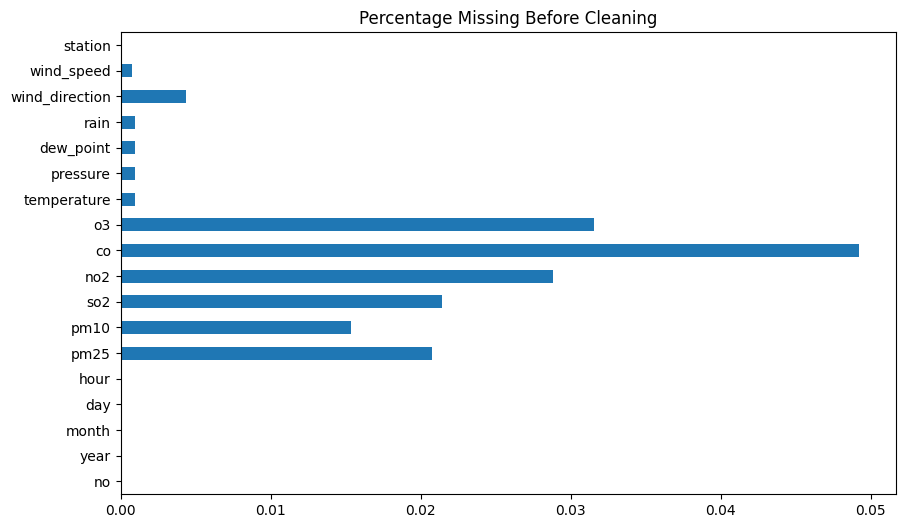

In [11]:
df.isna().mean().plot(kind="barh", figsize=(10,6), title="Percentage Missing Before Cleaning")
plt.show()

#### Why this step is necessary

- Identifies structural gaps in pollutant and meteorological data.
- Helps justify interpolation vs. dropping rows, maintaining transparency.
- Supports reproducibility by documenting pre-cleaning completeness.

### 7. Handle Missing Data

#### 7.1 Interpolate weather variables:

In [12]:
weather_cols = ["temperature", "pressure", "dew_point", "wind_speed"] # Define weather-related columns
df[weather_cols] = df[weather_cols].interpolate(method="time") # Interpolate missing weather data
builder.add_step("Handled missing values in weather-related columns") # Add step to metadata

##### Why this step is necessary

- Weather values typically change smoothly over hours; time-based interpolation preserves realistic dynamics.
- Avoids unnecessary row removal that would fragment time series.
- Ensures downstream models relying on meteorological predictors do not experience missing-value errors.

#### 7.2 Fill RAIN and wd:

In [13]:
df["rain"] = df["rain"].fillna(0) # Fill missing rain values with 0
df["wind_direction"] = df["wind_direction"].ffill() # Forward fill missing wind direction values
builder.add_step("Handled missing values in rain and wd columns") # Add step to metadata

##### Why this step is necessary

- Rain is sparse and binary/low-frequency; missing values almost always indicate “no recorded rain”.
- Prevents artificial inflation of rainfall events.
- Wind direction normally varies smoothly, so forward-filling preserves realistic temporal continuity without introducing artificial jumps.
- Avoids creating missing values that would break time-series models later.

#### 7.3 Interpolate PM2.5:

In [14]:
df["pm25"] = df["pm25"].interpolate(method="time") # Interpolate missing PM2.5 values
builder.add_step("Interpolated missing PM2.5 values") # Add step to metadata

##### Why this step is necessary

- PM2.5 is the primary target variable; dropping rows would break the temporal structure.
- Hour-to-hour behaviour is continuous enough that interpolation reflects typical instrument gaps.
- Avoids bias created by unequal missingness across stations or seasons.

### 8. Remove Unnecessary Columns

In [15]:
df = df.reset_index() # Reset index to make datetime a column again
df = df.drop(columns=[
    "no", "pm10","so2","no2","co","o3"
]) # Drop unnecessary columns
df.info()
builder.add_step("Dropped unused pollutant columns (PM10, SO2, NO2, CO, O3)") # Add step to metadata
builder.add_step("Dropped index column (no)") # Add step to metadata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   datetime        420768 non-null  datetime64[ns]
 1   year            420768 non-null  int64         
 2   month           420768 non-null  int64         
 3   day             420768 non-null  int64         
 4   hour            420768 non-null  int64         
 5   pm25            420768 non-null  float64       
 6   temperature     420768 non-null  float64       
 7   pressure        420768 non-null  float64       
 8   dew_point       420768 non-null  float64       
 9   rain            420768 non-null  float64       
 10  wind_direction  420768 non-null  category      
 11  wind_speed      420768 non-null  float64       
 12  station         420768 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(6), int64(4)
memory usage: 36.1 MB


#### Why this step is necessary

1.  Removing Unused Pollutants (PM10, SO2, NO2, CO, O3)
    - These pollutants are not needed for the hypotheses or modelling defined in the project plan.
    - Reduces file size before committing to GitHub (important due to LFS constraints).
    - Prevents confusion during analysis, keeping the dataset focused on the variables actually used.

2. Removing the “no” Index Column
    - `no` is an artefact of raw station files and does not correspond to meaningful temporal indexing.
    - Keeping it risks accidental grouping or filtering errors.

### 9. Remove incomplete 2017 data

In [16]:
print("Years before filtering:", df['datetime'].dt.year.unique()) # Check years before filtering


Years before filtering: [2013 2014 2015 2016 2017]


In [17]:
df = df[df['datetime'].dt.year < 2017].copy() # Filter out data from 2017 onwards
builder.add_step("Filtered out data from 2017 onwards") # Add step to metadata

In [18]:
print("Years after filtering:", df['datetime'].dt.year.unique())
print(f"Remaining rows after removing 2017: {len(df):,}")

Years after filtering: [2013 2014 2015 2016]
Remaining rows after removing 2017: 403,776


#### Why this step is necessary

- 2017 is not a full year; including partial seasonal cycles introduces seasonality bias.
- Seasonal hypothesis testing (H1) requires complete years to avoid artificially short autumn/winter segments.
- Ensures temporal consistency for feature engineering (lags, rolling windows).

### 10. Duplicate Handling

In [19]:
df.duplicated().sum() # Check for duplicate rows
df = df.drop_duplicates() # Drop duplicate rows
builder.add_step("Removed duplicate rows") # Add step to metadata

#### Why this step is necessary

- Prevents inflated averages or duplicated timestamp values.
- Ensures clean structure for downstream modelling (especially linear models and forecast validation).
- Essential for transparent data lineage.

### 11. Load and Merge Station Metadata

In [20]:
station_metadata = pd.read_csv(METADATA_PATH) # Load station metadata
df = df.merge(station_metadata, on='station', how='left') # Merge metadata with main dataframe
df["station"] = df["station"].astype('category') # Ensure station column is categorical
df["area_type"] = df["area_type"].astype('category') # Ensure area_type column is categorical
builder.add_step("Merged spatial metadata (latitude, longitude, area type)") # Add step to metadata
builder.add_step("Converted 'station' and 'area_type' columns to categorical data types") # Add step to metadata
df.head()

,datetime,year,month,day,hour,pm25,temperature,pressure,dew_point,rain,wind_direction,wind_speed,station,latitude,longitude,area_type
0,2013-03-01,2013,3,1,0,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,guanyuan,39.941746,116.361478,urban
1,2013-03-01,2013,3,1,0,3.0,-2.3,1020.8,-19.7,0.0,E,0.5,changping,40.220772,116.231204,suburban
2,2013-03-01,2013,3,1,0,6.0,0.1,1021.1,-18.6,0.0,NW,4.4,gucheng,39.908156,116.239596,residential
3,2013-03-01,2013,3,1,0,8.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,wanliu,39.990376,116.287252,residential
4,2013-03-01,2013,3,1,0,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,aotizhongxin,40.003388,116.407613,urban


#### Why this step is necessary

1. Merging Station Metadata
    - Incorporates spatial context (latitude, longitude, area_type), required for H2 and later modelling.
    - Allows spatial EDA, clustering, and structured comparisons between station types.
    - Creates a unified dataset so all exploratory work uses the same structure.
2. Converting Station and Area Type to Categories
    - Reduces memory usage.
    - Ensures consistent categorical sorting and grouping.
    - Simplifies later one-hot encoding for machine learning.

### 12. Create Seasonal Categories

In [21]:
def assign_season(month):
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    else:
        return "autumn"

df["season"] = df["month"].apply(assign_season).astype("category")
builder.add_step("Added season variable") # Add step to metadata

#### Why this step is necessary

- Supports H1 (Seasonal Patterns) directly.
- Avoids recomputing season logic across multiple notebooks.
- Creates a categorical seasonal grouping for ANOVA, boxplots, and statistical tests.

### Add Day of Week column

In [22]:
df['day_of_week'] = df['datetime'].dt.dayofweek # Monday=0, Sunday=6

#### Why this step is necessary

- Supports H4 (Temporal Patterns) directly.
- Avoids recomputing accross notebooks.

### 14. Final Missing Data Check

In [23]:
builder.add_step("Verified cleaned dataset structure") # Add step to metadata
df.isna().sum() # Final check for missing values

datetime          0
year              0
month             0
day               0
hour              0
pm25              0
temperature       0
pressure          0
dew_point         0
rain              0
wind_direction    0
wind_speed        0
station           0
latitude          0
longitude         0
area_type         0
season            0
day_of_week       0
dtype: int64

### Why this step is necessary

- Confirms cleaning processes were effective.
- Ensures the dataset contains no remaining structural issues before feature engineering.
- Prevents silent failures in downstream notebooks.

---

## Save Cleaned Dataset

Export the cleaned dataset:

In [24]:
df.to_csv(OUTPUT_PATH, index=False) # Save cleaned dataset to CSV
print("Saved cleaned dataset to:", OUTPUT_PATH) # Print output path
builder.add_step("Saved cleaned dataset to CSV") # Add step to metadata

Saved cleaned dataset to: /home/robert/Projects/beijing-air-quality/data/cleaned/beijing_cleaned.csv


## Save metadata file

In [25]:
builder.add_columns(df.columns) # Add columns the dataframe
builder.add_record_count_from_df(df) # Set record count from the cleaned dataframe    
builder.add_record_stats(OUTPUT_PATH) # Add record statistics
builder.write(PROJECT_ROOT / "data" /"cleaned" / "_metadata.yml") # Write metadata to YAML

📄 Metadata written to: /home/robert/Projects/beijing-air-quality/data/cleaned/_metadata.yml


## Cleaning Summary

The final cleaned dataset contains:

- ✔ Fully repaired timestamps
- ✔ Consistent naming conventions and data types
- ✔ No duplicated rows
- ✔ No missing values in core variables after interpolation
- ✔ Spatial metadata merged for downstream hypothesis testing (H2)
- ✔ Seasons added for H1 and time-series grouping
- ✔ Exported CSV

This dataset is now ready for Notebook 03 – Feature Engineering.

---
### AI Assistance Note
Some narrative text and minor formatting or wording improvements in this notebook were supported by AI-assisted tools (ChatGPT for documentation clarity, Copilot for small routine code suggestions, and Grammarly for proofreading). All analysis, code logic, feature engineering, modelling, and interpretations were independently created by the author.